In [1]:
#import libraries

import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

#Read data
df= pd.read_csv(r"C:\Users\user\Downloads\movies.csv")

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Checking for missing data

for col in df.columns:
    misng = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,misng))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# removing rows having null values

df=df.dropna(how="any")

In [5]:
# change data type of columns

df["budget"].astype('int64')
df["gross"].astype('int64')

0        46998772
1        58853106
2       538375067
3        83453539
4        39846344
          ...    
7648    426505244
7649    319715683
7650    245487753
7651    111105497
7652    461421559
Name: gross, Length: 5421, dtype: int64

In [6]:
#Sorting dataframe by column gross

df=df.sort_values(by=["gross"], ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


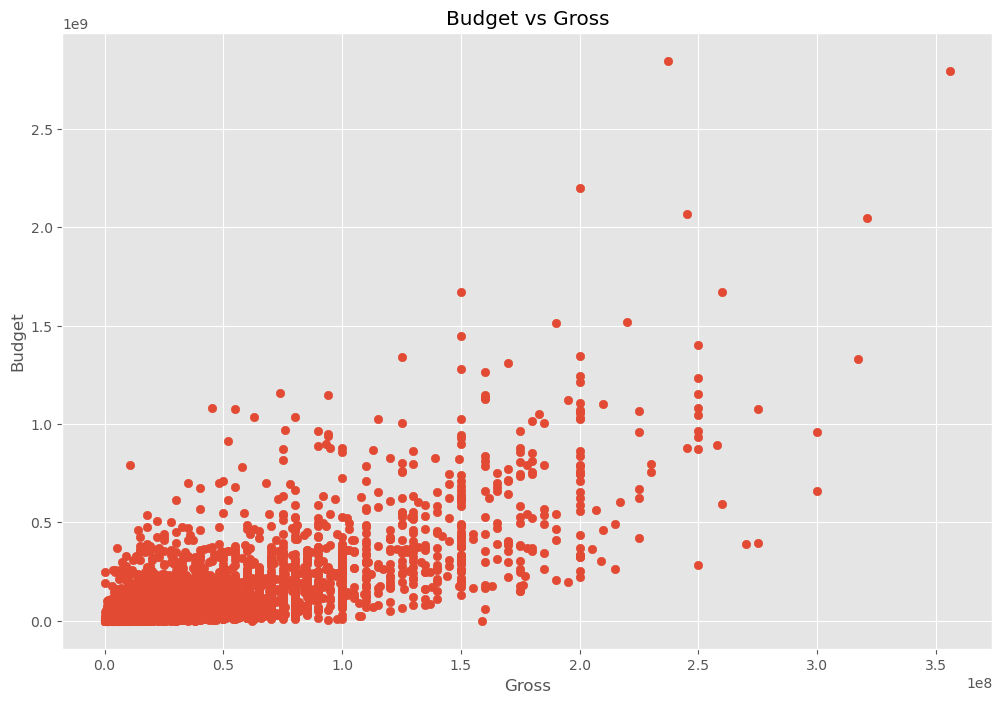

In [7]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget vs Gross")
plt.xlabel("Gross")
plt.ylabel("Budget")
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

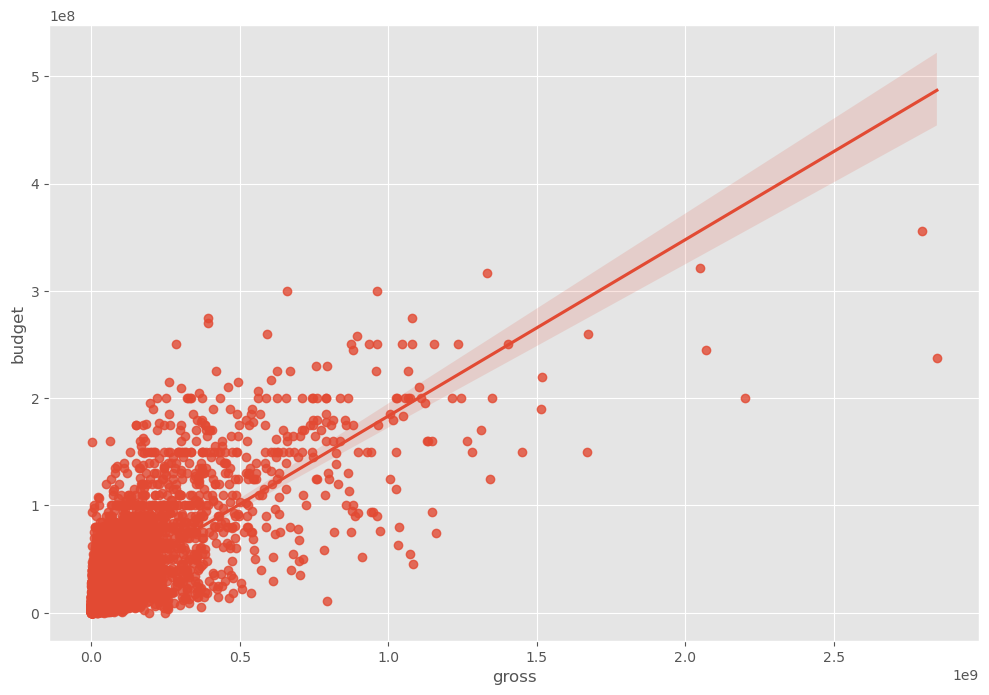

In [8]:
#Regression plot with budget vs gross

sns.regplot(x="gross", y="budget", data=df)

In [9]:
# Top 10 movies having highest gross

movielst = df[["name","gross"]].sort_values(by=["gross"],ascending=False)
movielst.head(n=10)

,name,gross
5445,Avatar,2.847246e+09
7445,Avengers: Endgame,2.797501e+09
3045,Titanic,2.201647e+09
6663,Star Wars: Episode VII - The Force Awakens,2.069522e+09
7244,Avengers: Infinity War,2.048360e+09
7480,The Lion King,1.670728e+09
6653,Jurassic World,1.670516e+09
6043,The Avengers,1.518816e+09
6646,Furious 7,1.515341e+09
7494,Frozen II,1.450027e+09


In [10]:
# Top 5 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum().sort_values(by=["gross"],ascending=False).head()
CompanyGrossSum

,gross
company,
Warner Bros.,5.461096e+10
Universal Pictures,5.124111e+10
Columbia Pictures,4.235643e+10
Paramount Pictures,4.002170e+10
Twentieth Century Fox,3.954257e+10


<AxesSubplot:xlabel='company'>

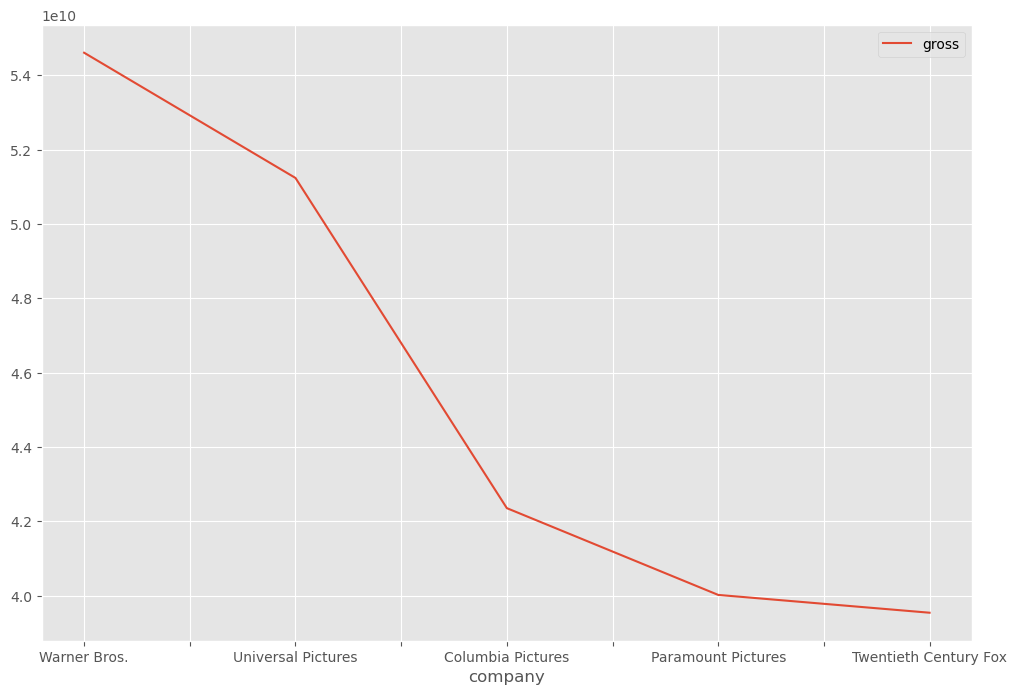

In [11]:
#line plot showing top 5 companies by gross revenue

CompanyGrossSum.plot()